<a href="https://colab.research.google.com/github/dorelle876/Demo-repo/blob/main/day7of_3_2_Pandas_ClassNotes_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

Pandas is an open source library built on top of NumPy
* Allows for very fast analysis – data cleaning, preparationmodifications, etc.
* Built-in visualization features 
* Works well with all types of data.
* DataFrames
* Missing Data
* GroupBy
* Merging, Joining data
* etc, etc, etc

In [34]:
#must import pandas to access its functions in your notebook
import pandas as pd
import numpy as np #we'll also use a little numpy

##Series in pandas

Series in Pandas have a labeled index and a datapoint. Series are a part of DataFrames. They are a one-dimensional ndarray with axis labels 


In [35]:
#create a sample series

labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)

d = {'a':10, 'b':20, 'c':30}


In [36]:
pd.Series(data = my_data, index=labels)

a    10
b    20
c    30
dtype: int64

##Dataframes (df)

Dataframes (df) are a key part of pandas, they are two-dimensional, tabular data that allow you to work with data in columns and rows.

In [37]:
#create a dataframe wiht random values using numpy

from numpy.random import randn

np.random.seed(123)

In [38]:
df = pd.DataFrame(randn(5,4), #creating a new dataframe, with five rows, four columns
                  ['A','B','C','D','E'],['W','X','Y','Z']) #labeling the rows and columns

df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


##Dealing with rows and columns

Select columns, pass a list of column names

In [ ]:
#returns a vertical slice of the data with only columns W,X
#does not affect the original dataframe

df[['W','X']]

Create new columns in dataframe

In [ ]:
df['new'] = df['W'] + df['Y']

df

Deleting columns

In [ ]:
#delete using df.drop()
#inplace=True means the operation modifies the underlying data
#instead of returning anything

df.drop('new', axis=1, inplace=True) 

df


In [42]:
#creating a new dataframe with a subset of our data

df2 = df[['W','X']]
df2

,W,X
A,-1.085631,0.997345
B,-0.578600,1.651437
C,1.265936,-0.866740
D,1.491390,-0.638902
E,2.205930,2.186786


Deleting rows



In [ ]:
df.drop('E', axis = 0)

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351


Selecting rows using loc and iloc

In [ ]:
#loc accesses rows using the row label

df.loc['C']

W    1.265936
X   -0.866740
Y   -0.678886
Z   -0.094709
Name: C, dtype: float64

In [ ]:
#iloc accesses rows using the index position

df.iloc[2]

W    1.265936
X   -0.866740
Y   -0.678886
Z   -0.094709
Name: C, dtype: float64

##Filtering

In [ ]:
#check to see if each value is greater than 0

df > 0

,W,X,Y,Z
A,False,True,True,False
B,False,True,False,False
C,True,False,False,False
D,True,False,False,False
E,True,True,True,True


In [ ]:
#save it as a variable called booldf

booldf = df > 0

booldf

,W,X,Y,Z
A,False,True,True,False
B,False,True,False,False
C,True,False,False,False
D,True,False,False,False
E,True,True,True,True


In [ ]:
# pass booldf into original dataframe 
#to see values where condition was true

df[booldf]

,W,X,Y,Z
A,NaN,0.997345,0.282978,NaN
B,NaN,1.651437,NaN,NaN
C,1.265936,NaN,NaN,NaN
D,1.491390,NaN,NaN,NaN
E,2.205930,2.186786,1.004054,0.386186


In [ ]:
#combine filter into one statement

df[df>0]

,W,X,Y,Z
A,NaN,0.997345,0.282978,NaN
B,NaN,1.651437,NaN,NaN
C,1.265936,NaN,NaN,NaN
D,1.491390,NaN,NaN,NaN
E,2.205930,2.186786,1.004054,0.386186


Filtering based on criteria in a specific column

In [ ]:
df[df['Z']<0]

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351


In [ ]:
df[df['W']>0]

,W,X,Y,Z
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


Renaming columns

In [ ]:
#use df.rename and map old names to new names
df = df.rename(columns={'W':'Wnum', 'X': 'Xnum'})
#creates a new copy of df
df 

,Wnum,Xnum,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


In [31]:
#or rename on the existing dataframe using inplace=True

df.rename(columns={'Y':'Ynum', 'Z':'Znum'}, inplace=True)

#YOUR TURN 1

Use the random number dataset below to do the following:

* Create a new dataframe with only the first two columns.
* In the new dataframe, rename the columns.
* In the new dataframe, create a new column with values equal to the product of the first two columns.
* In the original dataframe, drop the fifth row.


In [ ]:
my_df = pd.DataFrame(randn(5,4), #creating a new dataframe, with five rows, four columns
                  ['A','B','C','D','E'],['W','X','Y','Z']) #labeling the rows and columns

my_df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [ ]:
new_df = my_df[['W','X']]
new_df

,W,X
A,0.737369,1.490732
B,-1.253881,-0.637752
C,-0.140069,-0.861755
D,-1.771533,-0.699877
E,0.002846,0.688223


In [ ]:
new_df.rename(columns={'W':'Win', 'X': 'Xray'})


,Win,Xray
A,0.737369,1.490732
B,-1.253881,-0.637752
C,-0.140069,-0.861755
D,-1.771533,-0.699877
E,0.002846,0.688223


In [ ]:
new_df['new'] = new_df['Win'] * new_df['Xray']


KeyError: ignored

In [ ]:
my_df.drop('E', axis = 0)

,W,X,Y,Z
A,1.255237,-0.688869,1.660952,0.807308
B,-0.314758,-1.085902,-0.732462,-1.212523
C,2.087113,0.164441,1.150206,-1.267352
D,0.181035,1.177862,-0.335011,1.031114


#Working with a dataset

Old Faithful eruption data, with two variables: time of eruption and waiting time until next eruption (in minutes)

In [ ]:
#importing data from a csv (which is stored in our class github)
faithful_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/faithful.csv')

In [ ]:
faithful_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/faithful.csv'), index_col=0).

SyntaxError: ignored

Inspecting dataframe to understand its size, labels and elements

In [ ]:
#make sure it's a dataframe
type(faithful_df)

pandas.core.frame.DataFrame

In [ ]:
#shape shows the number of rows and columns
faithful_df.shape

(272, 3)

In [ ]:
#columns shows the names of the columns
faithful_df.columns

Index(['Unnamed: 0', 'eruptions', 'waiting'], dtype='object')

In [ ]:
#head shows the first rows of data
#5 rows by default
faithful_df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [ ]:
#you can see however many rows you want
faithful_df.head(20)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
5,6,2.883,55
6,7,4.700,88
7,8,3.600,85
8,9,1.950,51
9,10,4.350,85


In [ ]:
#shows the bottom rows
#five by default
faithful_df.tail()

,Unnamed: 0,eruptions,waiting
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46
271,272,4.467,74


In [ ]:
#or you can see however many you want
faithful_df.tail(10)

,Unnamed: 0,eruptions,waiting
262,263,1.850,58
263,264,4.250,83
264,265,1.983,43
265,266,2.250,60
266,267,4.750,75
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46
271,272,4.467,74


In [ ]:
faithful_df.head(100)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
95,96,4.300,72
96,97,4.667,84
97,98,3.750,75
98,99,1.867,51


In [ ]:
#count non-NaN cells for each column or row
#ie the ones with data in them
#summarizes by column by default, or use axis=1 for rows
faithful_df.count()

Unnamed: 0    272
eruptions     272
waiting       272
dtype: int64

In [ ]:
#describe is a great summary of the data in each column
faithful_df.describe()

,Unnamed: 0,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,136.500000,3.487783,70.897059
std,78.663842,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,68.750000,2.162750,58.000000
50%,136.500000,4.000000,76.000000
75%,204.250000,4.454250,82.000000
max,272.000000,5.100000,96.000000


In [ ]:
#returns maximum of values of the specific axis
#over columns by default
faithful_df.max()

Unnamed: 0    272.0
eruptions       5.1
waiting        96.0
dtype: float64

In [ ]:
faithful_df.min()

Unnamed: 0     1.0
eruptions      1.6
waiting       43.0
dtype: float64

In [ ]:
faithful_df.std()

Unnamed: 0    78.663842
eruptions      1.141371
waiting       13.594974
dtype: float64

In [ ]:
faithful_df.median()

Unnamed: 0    136.5
eruptions       4.0
waiting        76.0
dtype: float64

##YOUR TURN 2

Using this dataset:
* How many non-null datapoints are in each column?
* Find the range of values
* Find the mean 
* Find the median
* Find all at once

In [ ]:
faithful_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/faithful.csv')

In [ ]:
type(faithful_df)

pandas.core.frame.DataFrame

In [ ]:
df.max()

Wnum    2.205930
Xnum    2.186786
Ynum    1.004054
Znum    0.386186
dtype: float64

In [ ]:
df.min()

Wnum   -1.085631
Xnum   -0.866740
Ynum   -2.426679
Znum   -1.506295
dtype: float64

In [ ]:
df.mean()

Wnum    0.659805
Xnum    0.665985
Ynum   -0.452503
Znum   -0.415616
dtype: float64

In [ ]:
df.median()

Wnum    1.265936
Xnum    0.997345
Ynum   -0.443982
Znum   -0.428913
dtype: float64

In [ ]:
df.describe()

,Wnum,Xnum,Ynum,Znum
count,5.000000,5.000000,5.000000,5.000000
mean,0.659805,0.665985,-0.452503,-0.415616
std,1.416830,1.364343,1.285611,0.695697
min,-1.085631,-0.866740,-2.426679,-1.506295
25%,-0.578600,-0.638902,-0.678886,-0.434351
50%,1.265936,0.997345,-0.443982,-0.428913
75%,1.491390,1.651437,0.282978,-0.094709
max,2.205930,2.186786,1.004054,0.386186


Working with only one column at a time

In [ ]:
faithful_df['eruptions']

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [ ]:
#create a new dataset with only one column
eruption_list = faithful_df['eruptions']

In [ ]:
eruption_list

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [ ]:
#note that it's NOT automatically a dataframe
type(eruption_list)

pandas.core.series.Series

In [ ]:
#we have to explicitly make it a dataframe
pd.DataFrame(eruption_list)

,eruptions
0,3.600
1,1.800
2,3.333
3,2.283
4,4.533
...,...
267,4.117
268,2.150
269,4.417
270,1.817


In [ ]:
# syntax is df('colum).function()
faithful_df['waiting'].median()

76.0

#YOUR TURN 3

Using this dataframe, run multiple functions on a couple different columns. Check your output and see if it's what you expected.

In [ ]:
faithful_df['waiting'].median()

76.0

In [ ]:
faithful_df['eruptions']

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [ ]:
faithful_df['eruptions'].std

<bound method Series.std of 0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64>

# A little bit of exploratory data viz

In [79]:
#import viz package matplotlib

import matplotlib.pyplot as plot
%matplotlib inline 
#this renders the plots in our notebooks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa053a6fe50>,
      dtype=object)

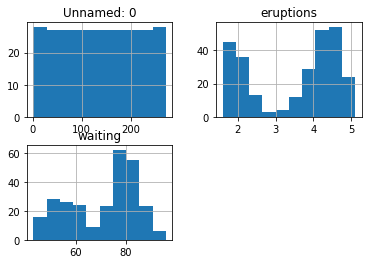

In [80]:
#make a histogram

faithful_df.hist()

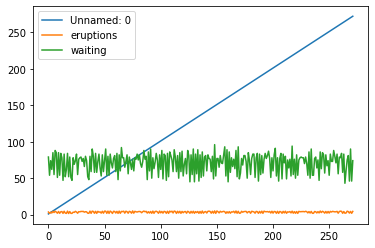

In [81]:
faithful_df.plot()

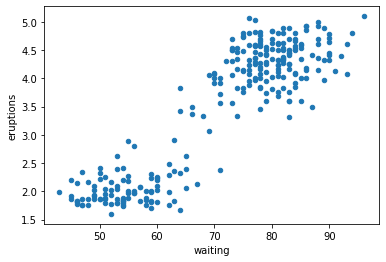

In [82]:
faithful_df.plot(kind = 'scatter', x = 'waiting', y = 'eruptions')

## Practice
Play with your plots a little bit. Use this website for inspiration and code snippets:

https://bit.ly/2WPTwtW

In [85]:
df = pd.DataFrame(randn(5,4),
                  ['A','B','C','D','E'],['W','X','Y','Z']) #labeling the rows and columns
df
                  

,W,X,Y,Z
A,-0.805367,-1.727669,-0.390900,0.573806
B,0.338589,-0.011830,2.392365,0.412912
C,0.978736,2.238143,-1.294085,-1.038788
D,1.743712,-0.798063,0.029683,1.069316
E,0.890706,1.754886,1.495644,1.069393


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa053051050>,
      dtype=object)

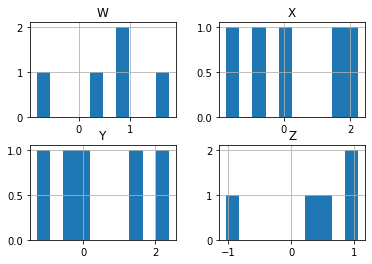

In [86]:
df.hist()

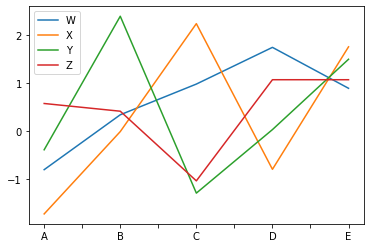

In [90]:
df.plot()

#Let's analyze a dataset together

Data from NYC's 311 system. Use this website for information about the dataset, including a record layout:

[NYC Open Data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)



In [3]:
import pandas as pd

df_311 = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/311_Service_Requests_from_2019May.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


# YOUR TURN 4

Run some code to get to know your dataframe.

* Look at the first five rows.
* How many rows and columns are there
* What are the names of the columns?
* Quickly summarize the data in each numerical column. 
* Look at your results. Is this something that makes sense to do on this data? Why or why not?

In [95]:
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


In [98]:
type(df_311)
pd.DataFrame(df_311)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69632,42634163,5/10/2019 0:00,5/10/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455,541 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,NaN,NaN,Closed,5/24/2019 15:24,The Department of Health and Mental Hygiene wi...,2.022760e+09,BRONX,40.814590,-73.913892,"(40.81459022279005, -73.9138921969276)"
69633,42624568,5/10/2019 0:00,5/16/2019 0:00,DOHMH,Standing Water,1-2 Family Dwelling,10308,221 MAYBURY AVENUE,MAYBURY AVENUE,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,6/8/2019 20:05,The Department of Health and Mental Hygiene wi...,5.051160e+09,STATEN ISLAND,40.549378,-74.140252,"(40.5493782172547, -74.14025187299927)"
69634,42638781,5/10/2019 0:00,5/10/2019 13:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10453,1824 CEDAR AVENUE,CEDAR AVENUE,ADDRESS,BRONX,NaN,NaN,Closed,5/24/2019 10:02,The Department of Health and Mental Hygiene wi...,2.028810e+09,BRONX,40.852919,-73.919966,"(40.85291902458401, -73.9199659548619)"
69635,42637637,5/10/2019 0:00,5/10/2019 12:54,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11221,691 KNICKERBOCKER AVENUE,KNICKERBOCKER AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/24/2019 9:14,The Department of Health and Mental Hygiene wi...,3.033850e+09,BROOKLYN,40.694574,-73.910892,"(40.694573889726, -73.91089180797395)"


In [102]:
df_311.count()

Unique Key                69637
Created Date              69637
Closed Date               64626
Agency                    69637
Complaint Type            69637
Location Type             53978
Incident Zip              67389
Incident Address          59033
Street Name               59032
Address Type              68307
City                      67416
Landmark                     16
Facility Type             24081
Status                    69637
Due Date                  32839
Resolution Description    63579
BBL                       55702
Borough                   69637
Latitude                  65634
Longitude                 65634
Location                  65634
dtype: int64

In [103]:
df_311.describe()

,Unique Key,BBL,Latitude,Longitude
count,6.963700e+04,5.570200e+04,65634.000000,65634.000000
mean,4.260307e+07,2.869652e+09,40.723149,-73.924517
std,5.269818e+04,1.184250e+09,0.083621,0.085089
min,4.251278e+07,0.000000e+00,40.500025,-74.252279
25%,4.258004e+07,2.030690e+09,40.664461,-73.972161
50%,4.260019e+07,3.034830e+09,40.716443,-73.929758
75%,4.262095e+07,4.023330e+09,40.780783,-73.874064
max,4.297343e+07,5.080480e+09,40.912869,-73.700597


#Sorting data


In [104]:
#defaults to ascending order
df_311.sort_values('Created Date')


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
12,42520595,5/1/2019 0:00,5/1/2019 4:16,NYPD,Noise - Residential,Residential Building/House,10016,139 EAST 27 STREET,EAST 27 STREET,ADDRESS,NEW YORK,NaN,Precinct,Closed,5/1/2019 8:00,Your request can not be processed at this time...,1.008830e+09,MANHATTAN,40.741938,-73.982678,"(40.74193771952419, -73.98267813378038)"
11,42524126,5/1/2019 0:00,5/3/2019 1:45,DEP,Noise,NaN,11226,601 MARLBOROUGH ROAD,MARLBOROUGH ROAD,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,3.052360e+09,BROOKLYN,40.635299,-73.963300,"(40.63529885534431, -73.96330029572755)"
9,42519734,5/1/2019 0:00,5/1/2019 11:23,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11691,1041 BEACH 20 STREET,BEACH 20 STREET,ADDRESS,Far Rockaway,NaN,NaN,Closed,5/15/2019 0:00,The Department of Health and Mental Hygiene wi...,4.157040e+09,QUEENS,40.603140,-73.753147,"(40.603139635103894, -73.75314685334116)"
8,42526596,5/1/2019 0:00,5/1/2019 14:53,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10009,14 1 AVENUE,1 AVENUE,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 14:45,The Department of Health and Mental Hygiene wi...,1.004290e+09,MANHATTAN,40.723414,-73.988311,"(40.723414081593475, -73.9883109901953)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63658,42627943,5/9/2019 9:59,5/17/2019 0:00,DOB,Borough Office,NaN,11101,37-12 28 STREET,28 STREET,ADDRESS,Long Island City,NaN,NaN,Closed,NaN,The Department of Buildings investigated this ...,4.003690e+09,QUEENS,40.755954,-73.933589,"(40.7559537758779, -73.93358914468376)"
63659,42631065,5/9/2019 9:59,NaN,DOHMH,Rodent,1-2 Family Dwelling,11693,165 BEACH 96 STREET,BEACH 96 STREET,ADDRESS,FAR ROCKAWAY,NaN,NaN,Pending,6/8/2019 9:59,For updated status of your complaint go online...,4.161690e+09,QUEENS,40.584373,-73.817477,"(40.58437280054309, -73.81747652666041)"
63660,42631729,5/9/2019 9:59,5/15/2019 15:33,DOT,Curb Condition,Sidewalk,10310,678 BEMENT AVENUE,BEMENT AVENUE,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,6/8/2019 9:59,The Department of Transportation will inspect ...,5.003040e+09,STATEN ISLAND,40.624854,-74.110680,"(40.62485417524056, -74.11067990662339)"
63661,42626088,5/9/2019 9:59,NaN,DPR,New Tree Request,Street,11356,11-14 129 STREET,129 STREET,ADDRESS,COLLEGE POINT,NaN,NaN,Open,4/28/2021 9:59,The Department of Parks and Recreation will re...,4.040060e+09,QUEENS,40.787488,-73.839194,"(40.787488359790885, -73.83919357343625)"


In [105]:
#use this for descending

df_311.sort_values('Created Date', ascending = False)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
63662,42624584,5/9/2019 9:59,5/15/2019 16:00,DPR,Damaged Tree,NaN,11238,585 PROSPECT PLACE,PROSPECT PLACE,LATLONG,BROOKLYN,NaN,NaN,Closed,5/17/2019 9:59,The Department of Parks and Recreation visited...,NaN,BROOKLYN,40.675464,-73.957117,"(40.675463847815614, -73.95711703408162)"
63661,42626088,5/9/2019 9:59,NaN,DPR,New Tree Request,Street,11356,11-14 129 STREET,129 STREET,ADDRESS,COLLEGE POINT,NaN,NaN,Open,4/28/2021 9:59,The Department of Parks and Recreation will re...,4.040060e+09,QUEENS,40.787488,-73.839194,"(40.787488359790885, -73.83919357343625)"
63660,42631729,5/9/2019 9:59,5/15/2019 15:33,DOT,Curb Condition,Sidewalk,10310,678 BEMENT AVENUE,BEMENT AVENUE,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,6/8/2019 9:59,The Department of Transportation will inspect ...,5.003040e+09,STATEN ISLAND,40.624854,-74.110680,"(40.62485417524056, -74.11067990662339)"
63659,42631065,5/9/2019 9:59,NaN,DOHMH,Rodent,1-2 Family Dwelling,11693,165 BEACH 96 STREET,BEACH 96 STREET,ADDRESS,FAR ROCKAWAY,NaN,NaN,Pending,6/8/2019 9:59,For updated status of your complaint go online...,4.161690e+09,QUEENS,40.584373,-73.817477,"(40.58437280054309, -73.81747652666041)"
63658,42627943,5/9/2019 9:59,5/17/2019 0:00,DOB,Borough Office,NaN,11101,37-12 28 STREET,28 STREET,ADDRESS,Long Island City,NaN,NaN,Closed,NaN,The Department of Buildings investigated this ...,4.003690e+09,QUEENS,40.755954,-73.933589,"(40.7559537758779, -73.93358914468376)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,42519734,5/1/2019 0:00,5/1/2019 11:23,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11691,1041 BEACH 20 STREET,BEACH 20 STREET,ADDRESS,Far Rockaway,NaN,NaN,Closed,5/15/2019 0:00,The Department of Health and Mental Hygiene wi...,4.157040e+09,QUEENS,40.603140,-73.753147,"(40.603139635103894, -73.75314685334116)"
10,42613472,5/1/2019 0:00,NaN,DEP,FATF,NaN,11222,329 GREENPOINT AVENUE,GREENPOINT AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Started,NaN,The Department of Environmental Protection has...,3.025250e+09,BROOKLYN,40.731483,-73.946271,"(40.73148270284829, -73.94627094704092)"
11,42524126,5/1/2019 0:00,5/3/2019 1:45,DEP,Noise,NaN,11226,601 MARLBOROUGH ROAD,MARLBOROUGH ROAD,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,3.052360e+09,BROOKLYN,40.635299,-73.963300,"(40.63529885534431, -73.96330029572755)"
12,42520595,5/1/2019 0:00,5/1/2019 4:16,NYPD,Noise - Residential,Residential Building/House,10016,139 EAST 27 STREET,EAST 27 STREET,ADDRESS,NEW YORK,NaN,Precinct,Closed,5/1/2019 8:00,Your request can not be processed at this time...,1.008830e+09,MANHATTAN,40.741938,-73.982678,"(40.74193771952419, -73.98267813378038)"


## Practice sorting

#Filtering columns

In [106]:
#select a column

df_311['Complaint Type']


0          Water System
1        Food Poisoning
2        Food Poisoning
3        Food Poisoning
4        Food Poisoning
              ...      
69632    Food Poisoning
69633    Standing Water
69634    Food Poisoning
69635    Food Poisoning
69636    Food Poisoning
Name: Complaint Type, Length: 69637, dtype: object

In [107]:
#select multiple columns

df_311[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Water System,QUEENS
1,Food Poisoning,MANHATTAN
2,Food Poisoning,MANHATTAN
3,Food Poisoning,BROOKLYN
4,Food Poisoning,QUEENS
...,...,...
69632,Food Poisoning,BRONX
69633,Standing Water,STATEN ISLAND
69634,Food Poisoning,BRONX
69635,Food Poisoning,BROOKLYN


In [108]:
#create a new df out of them

df_311_2 = df_311[['Complaint Type', 'Borough']]

##Practice filtering by columns

##Filtering by rows

In [116]:
#create a new dataframe to hold our results

df_food_poisoning = df_311[df_311['Complaint Type'] == 'Food Poisoning']

df_food_poisoning

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"
5,42524590,5/1/2019 0:00,5/1/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10009,119 AVENUE A,AVENUE A,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:41,The Department of Health and Mental Hygiene wi...,1.004350e+09,MANHATTAN,40.726364,-73.983321,"(40.7263640809953, -73.98332077635699)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69631,42634164,5/10/2019 0:00,5/10/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10023,269 AMSTERDAM AVENUE,AMSTERDAM AVENUE,ADDRESS,NEW YORK,NaN,NaN,Closed,5/24/2019 10:45,The Department of Health and Mental Hygiene wi...,1.011440e+09,MANHATTAN,40.778972,-73.981351,"(40.77897233667541, -73.98135058363005)"
69632,42634163,5/10/2019 0:00,5/10/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455,541 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,NaN,NaN,Closed,5/24/2019 15:24,The Department of Health and Mental Hygiene wi...,2.022760e+09,BRONX,40.814590,-73.913892,"(40.81459022279005, -73.9138921969276)"
69634,42638781,5/10/2019 0:00,5/10/2019 13:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10453,1824 CEDAR AVENUE,CEDAR AVENUE,ADDRESS,BRONX,NaN,NaN,Closed,5/24/2019 10:02,The Department of Health and Mental Hygiene wi...,2.028810e+09,BRONX,40.852919,-73.919966,"(40.85291902458401, -73.9199659548619)"
69635,42637637,5/10/2019 0:00,5/10/2019 12:54,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11221,691 KNICKERBOCKER AVENUE,KNICKERBOCKER AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/24/2019 9:14,The Department of Health and Mental Hygiene wi...,3.033850e+09,BROOKLYN,40.694574,-73.910892,"(40.694573889726, -73.91089180797395)"


In [110]:
#Add multiple criteria using & and or

df_food_poisoning_bronx = df_311[(df_311['Complaint Type'] == 'Food Poisoning') 
          & (df_311['Borough'] == 'BROOKLYN')] 

df_food_poisoning_bronx


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
8221,42546266,5/2/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Other (Explain Below),11230,1407 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/16/2019 19:39,The Department of Health and Mental Hygiene wi...,3.052350e+09,BROOKLYN,40.633729,-73.963788,"(40.633728991185656, -73.96378754662472)"
24365,42586376,5/4/2019 0:00,5/13/2019 16:28,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11209,8530 3 AVENUE,3 AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/18/2019 23:45,The Department of Health and Mental Hygiene wi...,3.060330e+09,BROOKLYN,40.624014,-74.030847,"(40.624014001229156, -74.03084689095088)"
24367,42589864,5/4/2019 0:00,5/6/2019 11:36,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11201,111 COURT STREET,COURT STREET,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/18/2019 20:45,Callers should contact the DOHMH Foodborne Ill...,3.002710e+09,BROOKLYN,40.690642,-73.991897,"(40.69064190997677, -73.99189743966743)"
30603,42595351,5/5/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Other (Explain Below),11216,476 MARCUS GARVEY BOULEVARD,MARCUS GARVEY BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/19/2019 19:21,The Department of Health and Mental Hygiene wi...,3.018590e+09,BROOKLYN,40.680492,-73.937562,"(40.680491558682455, -73.93756172956628)"
36060,42603504,5/6/2019 0:00,5/6/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11237,67 WILSON AVENUE,WILSON AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/20/2019 10:08,The Department of Health and Mental Hygiene wi...,3.031650e+09,BROOKLYN,40.702263,-73.928446,"(40.70226325776776, -73.92844555498132)"
36061,42603293,5/6/2019 0:00,5/16/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11237,1053 FLUSHING AVENUE,FLUSHING AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/20/2019 10:08,Callers should contact the DOHMH Foodborne Ill...,3.030130e+09,BROOKLYN,40.704164,-73.930175,"(40.70416369785813, -73.93017472076156)"
44726,42611826,5/7/2019 0:00,5/8/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11239,505 GATEWAY DRIVE,GATEWAY DRIVE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/21/2019 18:05,The Department of Health and Mental Hygiene wi...,3.044521e+09,BROOKLYN,40.651276,-73.868915,"(40.65127602271148, -73.86891466875586)"
44729,42612861,5/7/2019 0:00,5/7/2019 11:43,DOHMH,Food Poisoning,Other (Explain Below),11235,3117 OCEAN PARKWAY,OCEAN PARKWAY,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/21/2019 11:18,Callers should contact the DOHMH Foodborne Ill...,3.086790e+09,BROOKLYN,40.575299,-73.968848,"(40.57529925188215, -73.96884803240036)"
44734,42607146,5/7/2019 0:00,5/7/2019 16:13,DOHMH,Food Poisoning,Other (Explain Below),11236,622 REMSEN AVENUE,REMSEN AVENUE,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/21/2019 15:30,The Department of Health and Mental Hygiene wi...,3.047100e+09,BROOKLYN,40.651731,-73.918791,"(40.65173102723366, -73.91879099575826)"


In [118]:
#filter for noise complaints

df_311[df_311['Complaint Type'] == 'Noise']

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
11,42524126,5/1/2019 0:00,5/3/2019 1:45,DEP,Noise,NaN,11226,601 MARLBOROUGH ROAD,MARLBOROUGH ROAD,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,3.052360e+09,BROOKLYN,40.635299,-73.963300,"(40.63529885534431, -73.96330029572755)"
24,42524125,5/1/2019 0:04,5/8/2019 20:00,DEP,Noise,NaN,10475,3563 ROPES AVENUE,ROPES AVENUE,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,2.056550e+09,BRONX,40.889408,-73.819178,"(40.889408390994824, -73.81917795993981)"
37,42525163,5/1/2019 0:09,5/1/2019 14:01,DEP,Noise,NaN,10003,NaN,NaN,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,NaN,MANHATTAN,40.728596,-73.987671,"(40.728596115948555, -73.98767146528662)"
50,42530241,5/1/2019 0:12,5/1/2019 14:02,DEP,Noise,NaN,10009,361 EAST 10 STREET,EAST 10 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,1.003930e+09,MANHATTAN,40.726539,-73.979100,"(40.726539056574374, -73.97909950322429)"
58,42530240,5/1/2019 0:15,5/1/2019 14:02,DEP,Noise,NaN,10009,389 EAST 10 STREET,EAST 10 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,1.003938e+09,MANHATTAN,40.726166,-73.978205,"(40.726165603776785, -73.97820486905297)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69550,42628050,5/9/2019 23:36,5/13/2019 23:30,DEP,Noise,NaN,10001,430 WEST 33 STREET,WEST 33 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,1.007290e+09,MANHATTAN,40.753168,-73.997870,"(40.75316776913413, -73.99787049501836)"
69551,42626947,5/9/2019 23:36,5/13/2019 4:45,DEP,Noise,NaN,10027,NaN,NaN,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,NaN,MANHATTAN,40.811266,-73.957810,"(40.81126609731296, -73.95780983086226)"
69552,42624631,5/9/2019 23:36,5/13/2019 22:00,DEP,Noise,NaN,10019,NaN,NaN,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,NaN,MANHATTAN,40.765310,-73.991332,"(40.76531021023602, -73.99133241757852)"
69579,42628061,5/9/2019 23:44,5/14/2019 1:15,DEP,Noise,NaN,11411,216-02 LINDEN BOULEVARD,LINDEN BOULEVARD,ADDRESS,Cambria Heights,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,4.127340e+09,QUEENS,40.696145,-73.743390,"(40.6961448394419, -73.74339016602585)"


In [119]:
#filter for noise complaints and count them 

df_311[df_311['Complaint Type'] == 'Noise'].count()

Unique Key                1805
Created Date              1805
Closed Date               1791
Agency                    1805
Complaint Type            1805
Location Type                0
Incident Zip              1785
Incident Address          1342
Street Name               1342
Address Type              1805
City                      1785
Landmark                     0
Facility Type                0
Status                    1805
Due Date                     0
Resolution Description    1795
BBL                       1165
Borough                   1805
Latitude                  1769
Longitude                 1769
Location                  1769
dtype: int64

In [ ]:
#filter for noise complaints using fuzzy matching

df_311[df_311['Complaint Type'].str.contains('Noise')]

##Practice filtering by rows

In [120]:
df_311[df_311['city'] == 'BROOKLYN'].count()

KeyError: ignored

In [ ]:
df_311

#Aggregating data

Aggregating means putting data into groups and then doing math on those groups (counting, summing, averaging, etc)

Using group by to aggregate by certain columns

In [8]:
#groups by borough and counts the number of unique keys
df_311.groupby(['Borough'])['Unique Key'].count()

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [9]:
df_311.groupby(['Borough'])['Unique Key'].count().sort_values(ascending=True)

Borough
Unspecified        861
STATEN ISLAND     3848
BRONX            10925
MANHATTAN        13133
QUEENS           18623
BROOKLYN         22247
Name: Unique Key, dtype: int64

In [10]:
df_311.groupby(['Borough'])['Unique Key'].count().sort_values(ascending=False)

Borough
BROOKLYN         22247
QUEENS           18623
MANHATTAN        13133
BRONX            10925
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [12]:
df_311.groupby(['Landmark'])['Unique Key'].count()

Landmark
CENTRAL PARK              4
CITY HALL                 1
CONEY ISLAND HOSPITAL     1
FT TOTTEN                 1
GRAND CENTRAL TERM        1
J F K AIRPORT             2
LA GUARDIA AIRPORT        1
PS 44                     1
UNDERWOOD PARK            1
UNION SQUARE PARK         1
WASHINGTON SQUARE PARK    2
Name: Unique Key, dtype: int64

In [13]:
df_311.groupby(['Landmark'])['Unique Key'].count().sort_values(ascending=False)

Landmark
CENTRAL PARK              4
WASHINGTON SQUARE PARK    2
J F K AIRPORT             2
UNION SQUARE PARK         1
UNDERWOOD PARK            1
PS 44                     1
LA GUARDIA AIRPORT        1
GRAND CENTRAL TERM        1
FT TOTTEN                 1
CONEY ISLAND HOSPITAL     1
CITY HALL                 1
Name: Unique Key, dtype: int64

In [15]:
df_311.groupby(['Complaint Type'])['Unique Key'].count()

Complaint Type
APPLIANCE                         313
Advocate - Other                    4
Advocate-Co-opCondo Abatement       1
Advocate-Personal Exemptions        5
Advocate-Prop Refunds/Credits       6
                                 ... 
WATER LEAK                        726
Water Conservation                 74
Water Quality                      40
Water System                     1519
Window Guard                        1
Name: Unique Key, Length: 186, dtype: int64

In [17]:
df_311.groupby(['Complaint Type'])['Unique Key'].count().sort_values(ascending=False)

Complaint Type
Noise - Residential                    5838
Request Large Bulky Item Collection    5301
Illegal Parking                        5257
Blocked Driveway                       3391
Street Condition                       3080
                                       ... 
Mosquitoes                                1
Illegal Fireworks                         1
Disorderly Youth                          1
LinkNYC                                   1
Window Guard                              1
Name: Unique Key, Length: 186, dtype: int64

#Missing data
 
 There are a few ways to check for missing values.

In [22]:
import numpy as np

In [18]:
df = {'A':[1,2,np.nan], 'B':[3,np.nan, np.nan]} #creating a sample df with missing values
df = pd.DataFrame(df) #convert to a dataframe

df

,A,B
0,1.0,3.0
1,2.0,NaN
2,NaN,NaN


In [19]:
#check for any missing values
#isnull() works for small datasets but isn't practical for large ones
df.isnull()

,A,B
0,False,False
1,False,True
2,True,True


In [20]:
#add up missing values by column
df.isnull().sum()

A    1
B    2
dtype: int64

In [23]:
#add up total missing values
df.isnull().sum().sum()

3

#Practice

How many nans are in the 311 data?

In [24]:
df_311.isnull()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69632,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
69633,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
69634,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
69635,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [26]:
df_311.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date                5011
Agency                        0
Complaint Type                0
Location Type             15659
Incident Zip               2248
Incident Address          10604
Street Name               10605
Address Type               1330
City                       2221
Landmark                  69621
Facility Type             45556
Status                        0
Due Date                  36798
Resolution Description     6058
BBL                       13935
Borough                       0
Latitude                   4003
Longitude                  4003
Location                   4003
dtype: int64

In [27]:
df_311.isnull().sum().sum()

231655

Dropping missing values

In [28]:
#drop all rows with missing values
df.dropna()

,A,B
0,1.0,3.0


In [29]:
#drop all  columns that contain nans
df.dropna(axis=1)

""
0
1
2


In [30]:
df.fillna(3)

,A,B
0,1.0,3.0
1,2.0,3.0
2,3.0,3.0
